# Sentiment analysis | Depp vs Heard

## Data extraction

Twitter extraction by keywords

### Imports

In [460]:
import tweepy as tw
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gonzalozabala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gonzalozabala/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Twitter authentificathion

In [461]:
ACCESS_KEY = "1528407397403959296-SiXEMki1ykYG1qg3WPht56Dh1nxvfm"
ACCESS_SECRET = "6BBykwX8DUyDKYpQ46pT7RfPMBM3E7muynpOpYSjgqPwo"
CONSUMER_KEY= 'fVDe8jYU1oWQKkOZlVHd17DDR'
CONSUMER_SECRET= '3EPEAxlpGl48QYl2iNBk6HlbrjONLWQ5qoDY61uVReLeHgbX6V'
BEARER = "AAAAAAAAAAAAAAAAAAAAADTKdAEAAAAAEygerXyhYaLCb0wzIuc7wsOak7w%3DJ6QKl3DzawKIUGdQaArG8yovhy8LpUr0MTgovJQ01naJ5b2BRZ"

In [462]:
import tweepy as tw
client = tw.Client(bearer_token=BEARER) 

### Tweets extraction

In [463]:
tag = 'man'
query = '#'+ tag +' -is:retweet lang:en'
tweets = client.search_recent_tweets(query=query, tweet_fields=['created_at'], max_results=100)

In [464]:
import pandas as pd

tweets_df = pd.DataFrame(tweets.data)
tweets_df

,created_at,id,text
0,2022-06-03 09:22:51+00:00,1532654031826468866,DC Men's Conference Starts Today #MAN-I-FEST2022🇬🇧🇺🇸🇩🇪🇳🇬🇿🇦🇮🇱 🇺🇬🇫🇷🇩🇰🇨🇳🇬🇭🇮🇪🇲🇾🇧🇪 🇦🇪🇺🇦 🇸🇩\nTime: Today Fri 5pm &amp; Sat 8am (GMT+1). Join us via:\n-YouTube: https://t.co/8NgJRPfeDc…\n-dciradio: https://t.co/RP5dn8eDBY\n-Mixlr: https://t.co/mePVqlxvpf\n-Telegram: https://t.co/YyxhUfCKPN… https://t.co/5AAiMSo78r
1,2022-06-03 09:17:22+00:00,1532652654912061446,"👀✈️🔊\nG-LMTC \n#LOG95VL \n#Loganair \n#United Kingdom\n#ATR 72-212 A \n#Loganair\n#407CD8\nFrom: #ABZ Aberdeen Dyce, United Kingdom\nTo: #MAN Manchester, United Kingdom\nAlt 14800ft\n #407CD8 \nSeen 85 Times\n#ScotRadar https://t.co/K0ah6XBoIq"
2,2022-06-03 09:16:41+00:00,1532652480336744448,@Coinmatik1 #man al network
3,2022-06-03 09:14:06+00:00,1532651829145878528,"RT @Reuters: A #man #shot and #killed two #women in the #parkinglot of the #Cornerstone #Church in #Iowa’s #Ames and then turned the #gun on #himself, #police said. #Usa #UsaCrime #UsaNews #massShooting https://t.co/QnXl88htFe"
4,2022-06-03 09:12:49+00:00,1532651508516388867,🌟STOCK ALERT🌟DIRECT FROM CONTRACT🌟2016 MAN TGM 18.250 18T CURTAIN FOR SALE🌟PRICED ONLINE: https://t.co/Hid9Lzu4ZD OR WhatsApp: +44 (0) 7900 682 202\n\n#trucks #truck #mantruck #usedtrucks #usedtrucksforsale #curtain #mantrucks #MAN #trucksforsale #trucksales #usedtrucksales https://t.co/ha605dOtgX
5,2022-06-03 09:10:43+00:00,1532650979937730560,Gostaria de sentar?\nWould like to sit?\n\n#tesao #horny #man #gay #bear #urso\n\n@centralmachos \n@AdoradorPaus \n@manjarola_ \n@centralmachos \n@BoysEmFoco \n@divulgaboy18 \n@_divulga_boys_ \n@nudesbelcity\n@SoParaDivulgar \n@2Divulgamens \n@sabordmacho \n@new_gaywanking\n@divulgay\n@Eh_Tesao https://t.co/GGHfKxkNzg
6,2022-06-03 09:07:04+00:00,1532650059979972609,Man shoots at Tulsa hospital five dead\nhttps://t.co/JEWatAn2fn\n\n#LatestNews #dead #hospital #man #shoots #Tulsa https://t.co/qyPSK8FkeJ
7,2022-06-03 09:05:00+00:00,1532649540511100928,Follow me and retweet baby please\n#milf #mature #ass #tits #anal #blowjob #hardcore #bbw #gay #lesbian #porn #sex #man #girl #tiktok #instagram #lgbt #rough #mom #sister #brother https://t.co/E070Dagk6e
8,2022-06-03 09:04:00+00:00,1532649290690183168,Sleeping man dodges death!\nhttps://t.co/bcoSsV13jp\n #man #sleeping #sleeps https://t.co/QQ0pgqoLPY
9,2022-06-03 09:04:00+00:00,1532649290631368704,Sleeping man dodges death!\nhttps://t.co/bcoSsV13jp\n #man #sleeping #sleeps https://t.co/NZ9EsBsItU


### Data pre-processing

Remove tags, links, rt, break lines, and puntuactions

https://towardsdatascience.com/selenium-tweepy-to-scrap-tweets-from-tweeter-and-analysing-sentiments-1804db3478ac

In [465]:
tags = "\B@\w+"
rt = 'RT'
links = "\S*https?:\S*"
break_line = "\n"
puntuaction = '[^\w\s]'

patterns_to_delete = [tags, rt, links, break_line, puntuaction]
patterns_to_delete

['\\B@\\w+', 'RT', '\\S*https?:\\S*', '\n', '[^\\w\\s]']

In [466]:
for pattern in patterns_to_delete:
    tweets_df['text'] = tweets_df['text'].str.replace(pattern, '', regex=True)

Removing stop words

In [467]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

tweets_df['text'] = tweets_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Tokenization and lemmatization:

In [468]:
from nltk.stem import WordNetLemmatizer

# Tokenization
tokenized_tweet = tweets_df['text'].apply(lambda x: x.split())

# Lemmatization
word_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])

#List of words to strings
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

tweets_df['text'] = tokenized_tweet

Delete duplicates

In [469]:
tweets_df.drop_duplicates(inplace=True, subset=["text"])
tweets_df

,created_at,id,text
0,2022-06-03 09:22:51+00:00,1532654031826468866,DC Mens Conference Starts Today MANIFEST2022 Time Today Fri 5pm amp Sat 8am GMT1 Join u viaYouTube dciradio Mixlr Telegram
1,2022-06-03 09:17:22+00:00,1532652654912061446,GLMTC LOG95VL Loganair United KingdomATR 72212 A Loganair407CD8From ABZ Aberdeen Dyce United KingdomTo MAN Manchester United KingdomAlt 14800ft 407CD8 Seen 85 TimesScotRadar
2,2022-06-03 09:16:41+00:00,1532652480336744448,man al network
3,2022-06-03 09:14:06+00:00,1532651829145878528,A man shot killed two woman parkinglot Cornerstone Church Iowas Ames turned gun police said Usa UsaCrime UsaNews massShooting
4,2022-06-03 09:12:49+00:00,1532651508516388867,STOCK ALEDIRECT FROM CONTRACT2016 MAN TGM 18250 18T CUAIN FOR SALEPRICED ONLINE OR WhatsApp 44 0 7900 682 202trucks truck mantruck usedtrucks usedtrucksforsale curtain mantrucks MAN trucksforsale trucksales usedtrucksales
5,2022-06-03 09:10:43+00:00,1532650979937730560,Gostaria de sentarWould like sittesao horny man gay bear urso
6,2022-06-03 09:07:04+00:00,1532650059979972609,Man shoot Tulsa hospital five deadLatestNews dead hospital man shoot Tulsa
7,2022-06-03 09:05:00+00:00,1532649540511100928,Follow retweet baby pleasemilf mature as tit anal blowjob hardcore bbw gay lesbian porn sex man girl tiktok instagram lgbt rough mom sister brother
8,2022-06-03 09:04:00+00:00,1532649290690183168,Sleeping man dodge death man sleeping sleep
10,2022-06-03 09:00:20+00:00,1532648365934133249,If reading probably want humiliate dont start Send cash app maybe start massaging foot fuckyou faggot givenemoney payme findom cashmaster man


### Visualization

Wordcloud

In [470]:
text = " ".join(review for review in tweets_df.text.astype(str))

In [471]:
wordcloud = WordCloud(background_color="white", width=500, height=500).generate(text)

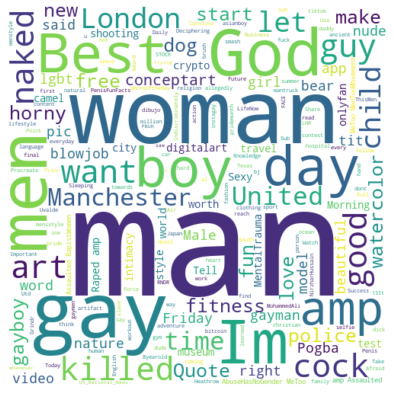

In [472]:

# Display the generated image:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()


### Model

In [473]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def apply_sia(text):
    sia = SentimentIntensityAnalyzer()
    polarity_scores = sia.polarity_scores(text)
    if polarity_scores['neu'] == 1.0:
        return "Neutral tweet"
    else:
        if polarity_scores['pos'] > polarity_scores['neg']:
            return "Positive tweet" 
        else:
            return "Negative tweet"

def apply_tb(text):
    analysis = TextBlob(text)
    # set sentiment 
    if analysis.sentiment.polarity >= 0:
        return 'positive'
    else: 
        return 'negative'

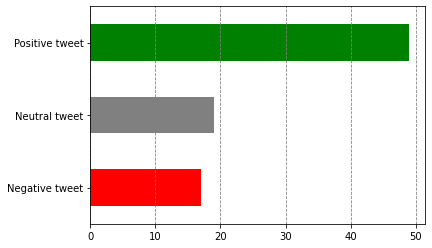

In [474]:
sentiments_nltk = pd.DataFrame(columns=['Tweet', 'Sentiment'])
for index, row in tweets_df.iterrows():
    df_length = len(sentiments_nltk)
    sentiments_nltk.loc[df_length] = [row['text'], apply_sia(row['text'])]
sentiments_nltk

sentiments_nltk['Sentiment'].value_counts().sort_index().plot(   kind='barh', 
                                                    color=['red', 'grey', 'green']).grid(   color='gray', 
                                                                                            linestyle='dashed', 
                                                                                            axis='x')

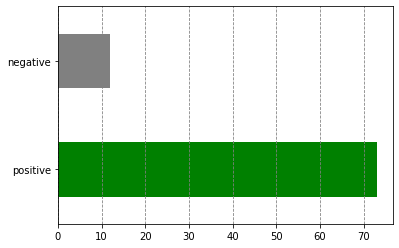

In [477]:
sentiments_nltk = pd.DataFrame(columns=['Tweet', 'Sentiment'])
for index, row in tweets_df.iterrows():
    df_length = len(sentiments_nltk)
    sentiments_nltk.loc[df_length] = [row['text'], apply_tb(row['text'])]
sentiments_nltk

sentiments_nltk['Sentiment'].value_counts().plot(   kind='barh', 
                                                    color=['green', 'grey', 'red']).grid(   color='gray', 
                                                                                            linestyle='dashed', 
                                                                                            axis='x')